In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [38]:
a = pd.read_csv('/content/sample_data/Churn_Modelling.csv')
a.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Univariate Analysis

Bar Plot

In [39]:
px.bar(a[0:20],x = 'Surname',y = 'CreditScore')

Pie Chart

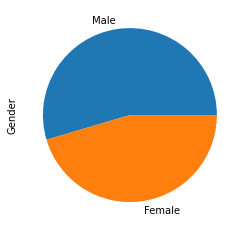

In [40]:
a['Gender'].value_counts().plot(kind = 'pie')

Bivariate Analysis

Scatterplot

In [41]:
px.scatter(a[0:1000],x = 'CreditScore',y = 'EstimatedSalary')

Multivariate Analysis

Pairplot

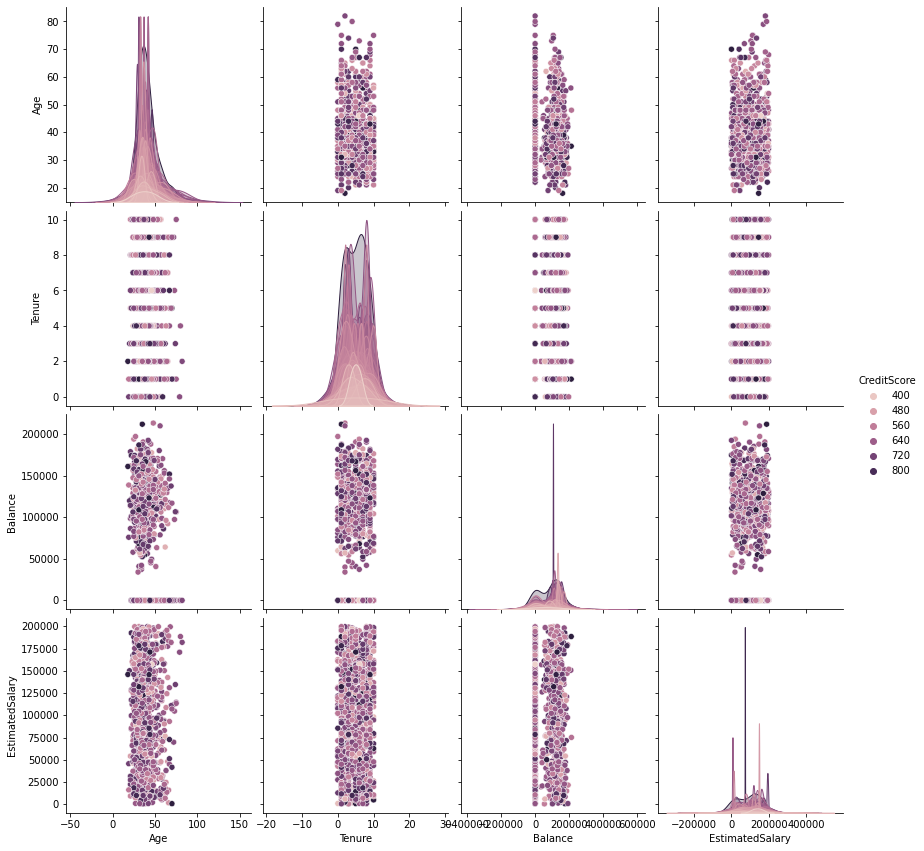

In [42]:
sns.pairplot(a[['Age','Tenure','CreditScore','Balance','EstimatedSalary']][0:1000],hue = 'CreditScore',height = 3)

Descriptive Statistics

In [43]:
a.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Text(3.799999999999997, 0.5, 'No of People')

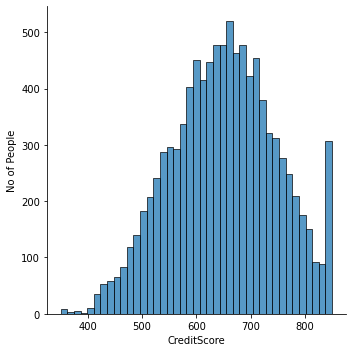

In [44]:
sns.displot(a['CreditScore'])
plt.ylabel('No of People')

In [45]:
px.histogram(a,x = 'CreditScore',color = 'Gender')

In [46]:
a.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Handling Outliers

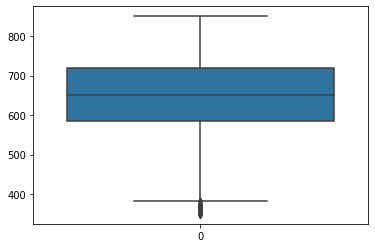

In [47]:
sns.boxplot(data = a['CreditScore'])

In [48]:
a['CreditScore'] = a['CreditScore'][(a['CreditScore'] <= 718) & (a['CreditScore'] >= 584)]

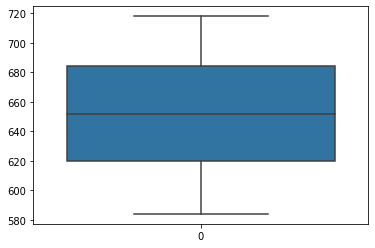

In [49]:
sns.boxplot(data = a['CreditScore'])

In [50]:
a['EstimatedSalary'] = a['EstimatedSalary'][(a['EstimatedSalary'] <= 718) & (a['EstimatedSalary'] >= 584)]

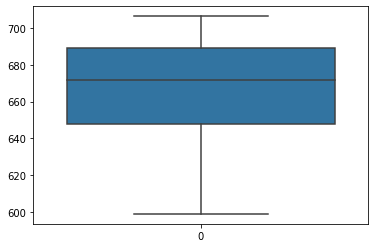

In [51]:
sns.boxplot(data = a['EstimatedSalary'])

Categorical columns and encoding

In [53]:
a.select_dtypes(include = ['object']).columns.tolist()

['Surname', 'Geography', 'Gender']

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()

In [56]:
a['Surname'] = le.fit_transform(a['Surname'])
a['Geography'] = le.fit_transform(a['Geography'])
a['Gender'] = le.fit_transform(a['Gender'])

In [57]:
a.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore        4954
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary    9990
Exited                0
dtype: int64

In [58]:
a.dropna(subset = ['CreditScore','EstimatedSalary'],inplace = True)

Splitting the data into dependent and independent variables

In [59]:
x = a.iloc[:,0:13].values
y = a.iloc[:,13:14].values

Scaling Independent Variables

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
StandardScaler().fit(y)

StandardScaler()

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state=0)

In [64]:
xtrain.shape

(5, 13)

In [65]:
xtest.shape

(2, 13)